<a href="https://colab.research.google.com/github/YehezkelShay/introduction-to-python/blob/master/Bicycles_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries

#Import Data

In [0]:
import numpy as np #Arrays and matricies
import matplotlib.pyplot as plt #Plots
import pandas as pd #Dataframes
from sklearn import datasets
import seaborn as sns #Plots
import pandas_profiling


In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
import os
print(os.getcwd())

os.listdir('/content')

/content


['.config', 'adc.json', 'sample_data']

In [0]:
bicycles = pd.read_csv("data.csv")

FileNotFoundError: ignored

# 1.Exploratory Data Analysis (EDA)


## 1.1 Statistics and Visualizations:



let's change the type of the data to DataFrame, it will make the EDA  easier

In [0]:
type(iris)

sklearn.utils.Bunch

In [0]:
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
df.shape


(150, 5)

1.1 use head() and info() to the first 5 rows and thre shape of the data and the types of types of the *columns*

In [0]:
  pd.set_option('display.max_columns', None)

  print(df.head())

  df.info() #a combination of df.dtypes and df.shape

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
target               150 non-null float64
dtypes: float64(5)
memory usage: 5.9 KB


### 1.1.2 Basic properties
nunique.value_counts,, max/min, isna().sum(), mean() etc.


In [0]:
def describe(df):
    return pd.concat([df.describe().T,pd.DataFrame(df.nunique().rename('nunique')),df.mad().rename('mad'),df.skew().rename('skew'),df.kurt().rename('kurt'),df.isna().sum().rename('isna')], axis=1).T
describe(df)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000
nunique,35.000000,23.000000,43.000000,22.000000,3.000000
mad,0.687556,0.336782,1.562747,0.658133,0.666667


Replace NA values with average of column

In [0]:
#Missing data
#print(df.notnull().sum())
print(df.isnull().sum())

a_mean = df["petal width (cm)"].mean()
df["petal width (cm)"] = df["petal width (cm)"].fillna(a_mean)

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


### 1.1.3 pandas_profiling
pandas_profiling is a quick data analysis tool.

For each column the following statistics - if relevant for the column type - are presented in an interactive HTML report:

*   Essentials: type, unique values, missing values
*   Quantile statistics like minimum value, Q1, median, Q3, maximum, range, interquartile range
*   Descriptive statistics like mean, mode, standard deviation, sum, median absolute deviation, coefficient of variation, kurtosis, skewness
*   Most frequent values
*   Histogram
*   Correlations highlighting of highly correlated variables, Spearman, Pearson and Kendall matrices
*   Missing values matrix, count, heatmap and dendrogram of missing values


In [0]:
pandas_profiling.ProfileReport(df)


Number of variables,5
Number of observations,150
Total Missing (%),0.0%
Total size in memory,5.0 KiB
Average record size in memory,34.2 B
Numeric,3
Categorical,1
Boolean,0
Date,0
Text (Unique),0
Rejected,1


###  1.1.4 Finding outliers
An outlier is any data point which differs greatly from the rest of the observations in a dataset

2 common ways for finding **univariate outlier**:

*  IQR -interquartile range (as shown in boxplot) - data point that falls outside of 1.5 times of an interquartile range above the 3rd quartile and below the 1st quartile

*  Z score - data point that falls outside of 3 standard deviations. we can use a z score and if the z score falls outside of 2 standard deviation


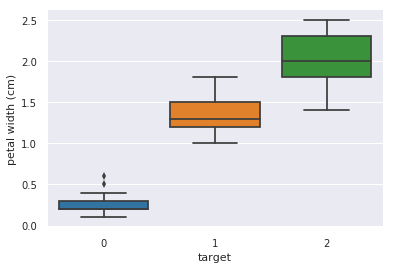

thecnumber of outliers is 2 :
23    0.5
43    0.6
Name: petal width (cm), dtype: float64


In [0]:
%matplotlib inline
sns.boxplot(x='target', y='petal width (cm)', data=df)
plt.show()

petal_width_is_0=df.loc[df['target'] == 0,'petal width (cm)']
q1, q3= np.percentile(petal_width_is_0,[25,75])
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
print('the number of outliers is',(upper_bound<petal_width_is_0).sum(),":",)
print((petal_width_is_0.loc[upper_bound<petal_width_is_0]))


In [0]:
outliers=[]
def detect_outlier(data_1):
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

outlier_datapoints = detect_outlier(petal_width_is_0)

print('the number of outliers is',len(outlier_datapoints),":",)
print(outlier_datapoints)

the number of outliers is 1 :
[0.6]


### 1.1.5 Proportions of groups

In [0]:
sns.countplot('target', data=df)
plt.show()

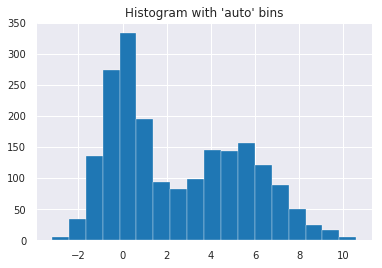

In [0]:
import matplotlib.pyplot as plt
rng = np.random.RandomState(10)  # deterministic random data
a = np.hstack((rng.normal(size=1000),rng.normal(loc=5, scale=2, size=1000)))
plt.hist(a, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


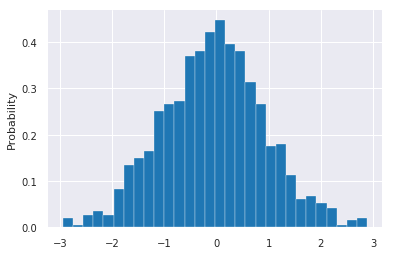

In [0]:
import matplotlib.pyplot as plt
import numpy as np
x = np.random.normal(size = 1000)
plt.hist(x, normed=True, bins=30)
plt.ylabel('Probability');

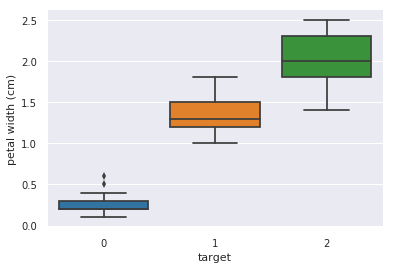

In [0]:
sns.boxplot(x=df["target"], y=df["petal width (cm)"], data=df)
plt.show()

In [0]:
import matplotlib.pyplot as plt
plt.hist([1, 2, 1], bins=[0, 1, 2, 3])
plt.show()

In [0]:
#df.select_dtypes(include='category').describe()

In [0]:
#df.apply(lambda x: x.value_counts()).T.stack()
#iris_df.target.value_counts()

In [0]:
df['target'] = df['target'].astype('int').astype('category') 


Text(0, 0.5, 'Number of videos')

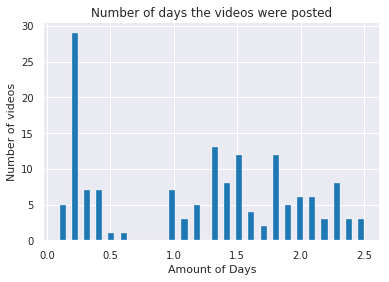

In [0]:
df["petal width (cm)"].hist(bins=50)
plt.title('Number of days the videos were posted')
plt.xlabel('Amount of Days')
plt.ylabel('Number of videos')




In [0]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="target",palette='coolwarm',height=6,aspect=2)
g = g.map(plt.hist,"petal width (cm)",bins=20,alpha=0.7).add_legend()

In [0]:
  p = sns.FacetGrid(df, col="target")
  p= p.map(plt.hist, "sepal width (cm)")
  plt.show()


In [0]:
 p= map(plt.hist, "petal width (cm)")
plt.show()

In [0]:
sns.distplot(df["petal width (cm)"])
plt.show()


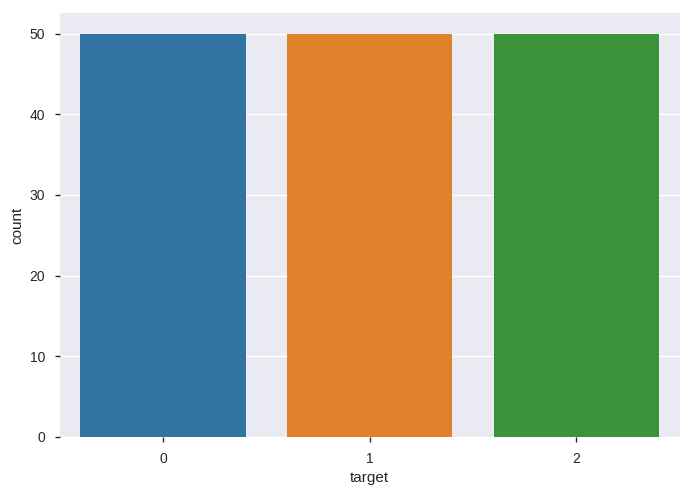

In [0]:
sns.countplot('target', data=df)
plt.show()

In [0]:
sns.regplot(x='petal length (cm)', y='petal width (cm)', data=df,fit_reg=True)
plt.show()

In [0]:
sns.boxplot(x='target', y='petal width (cm)', data=df)
plt.show()

In [0]:
sns.lmplot(x='petal length (cm)', y='petal width (cm)', data=df,fit_reg=True,col='target')
plt.show()

In [0]:
#Map a color per group

# Use the 'hue' argument to provide a factor variable
sns.lmplot( x='petal length (cm)', y='petal width (cm)', data=df, fit_reg=False, hue='target', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')
 


In [0]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [0]:
cov = df.cov()

corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [0]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)
y_kmeans = kmeans.predict(df)

In [0]:
plt.scatter(x=df['sepal length (cm)'], y=df['sepal width (cm)'], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);


Model Evaluation

In [0]:
#Print Confusion Matrix
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score

plt.figure()
cm = confusion_matrix(test_y, preds_y) 
labels = ['Stable and Popular', 'Hot', 'Everything else']
plt.figure(figsize=(8,6))
sns.heatmap(cm, xticklabels = labels, yticklabels = labels, annot = True, fmt='d', cmap="Blues", vmin = 0.2);
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

NameError: ignored

In [0]:
print("Recall: {0}".format(round(recall_score(test_Y, preds_y, labels=[0, 1, 2], average='macro'),4)))
print("Precision: {0}".format(round(precision_score(test_Y, preds_y, labels=[0, 1, 2], average='macro'),4)))
print("f1 score: {0}".format(round(f1_score(test_Y, preds_y, labels=[0, 1, 2], average='macro'),4)))
